# Intuition behind Eigen Values and Eigen Vectors


**Eigen vectors** are vectors which are fixed in direction under a given linear transformation. The scaling factor of these Eigen vectors are called **Eigen values**.

These **Eigen-pairs**(Eigen value and corresponding vector) are analogous to the roots of a polynomial. For example, consider cubic polynomials in a single variable, having 3 distinct roots. The general structure of these polynomials remain the same, but **rooted** at different points.
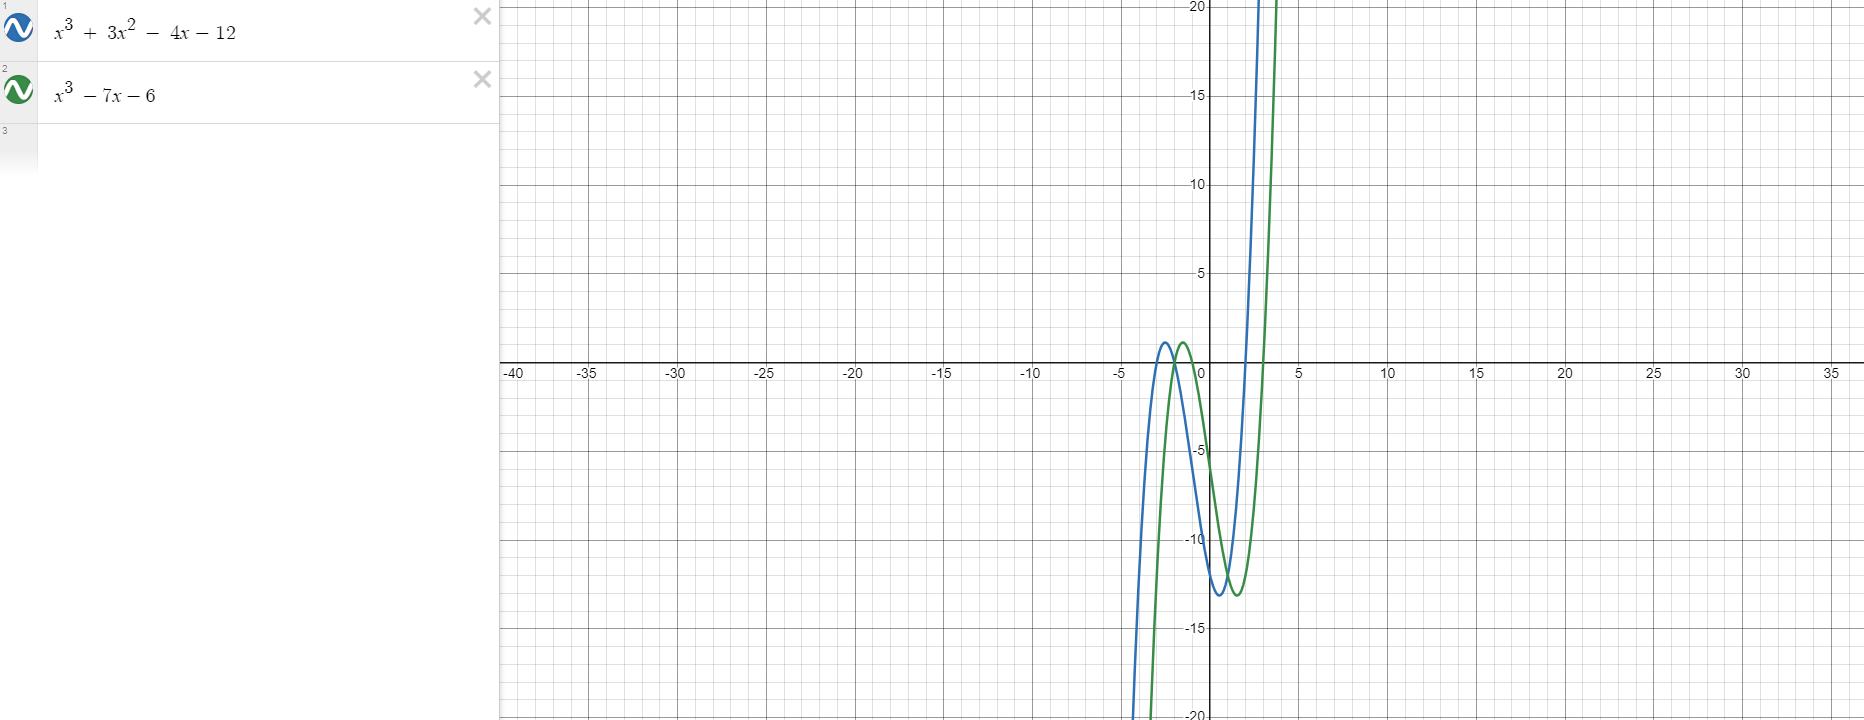


### **So, what does this mean?**

If you are working with an invariant line/plane/hyperplane, the amount of transformation that can be performed to the surrounding space is limited. So, the eigen vectors, being fixed, act like skewers that restrict the linear transformations and hold it in place.

So, verrrryyyy roughly, the eigen values are a measure of the distortion induced by the linear transformation, and the eigen vectors specify the direction of orientation of the distortion.

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

### Eigenvalue and Eigenvector Calculation for a 2x2 Matrix


In [4]:
def compute_eigenvalues_2x2(a, b, c, d):
    trace = a + d
    determinant = a * d - b * c

    discriminant = trace**2 - 4 * determinant
    sqrt_discriminant = math.sqrt(discriminant)

    lambda1 = (trace + sqrt_discriminant) / 2
    lambda2 = (trace - sqrt_discriminant) / 2

    return lambda1, lambda2



In [5]:
def compute_eigenvector_2x2(a, b, c, d, eigenvalue):
    # Solve (A - lambda I) v = 0
    if b != 0:
        x = 1
        y = (eigenvalue - a) / b
    else:
        x = 0
        y = 1

    return x, y

### Eigenvalue and Eigenvector Calculation for a 3x3 Matrix

In [6]:
def compute_eigenvalues_3x3(A):
    a, b, c = 1, -np.trace(A), np.linalg.det(A)
    p = np.poly(A)

    eigenvalues = np.roots(p)

    return eigenvalues

def compute_eigenvectors_3x3(A, eigenvalues):
    eigenvectors = []

    for eigenvalue in eigenvalues:
        I = np.eye(3)
        M = A - eigenvalue * I
        _, v = np.linalg.qr(M)  # Use QR decomposition for simplicity
        eigenvectors.append(v[:, 0])  # Take the first vector from QR

    return eigenvectors

In [7]:
A = np.array([[2, 6, 10],
              [3, 8, 13],
              [-2, -6, -10]])



eigenvalues = compute_eigenvalues_3x3(A)

eigenvectors = compute_eigenvectors_3x3(A, eigenvalues)

print(f"Eigenvalues: {eigenvalues}")
for i, vector in enumerate(eigenvectors):
    print(f"Eigenvector for eigenvalue {eigenvalues[i]}: {vector}")

Eigenvalues: [-2.00000000e+00  2.00000000e+00  5.85157361e-16]
Eigenvector for eigenvalue -1.9999999999999998: [-5.38516481  0.          0.        ]
Eigenvector for eigenvalue 1.9999999999999953: [-3.60555128  0.          0.        ]
Eigenvector for eigenvalue 5.85157360659147e-16: [-4.12310563  0.          0.        ]


## Using numpy

### Eigenvalues and Eigenvectors Calculation

In this section, we compute the eigenvalues and eigenvectors of the matrix \( A \) using NumPy's `linalg.eig` function.

The matrix \( A \) is defined as:

 A = \begin{pmatrix} 4 & -2 \\ 1 & 1 \end{pmatrix} \

The function `np.linalg.eig(A)` returns two outputs:
1. **Eigenvalues**: The scalars \( \lambda \) that satisfy the equation \( A \mathbf{v} = \lambda \mathbf{v} \).
2. **Eigenvectors**: The vectors \( \mathbf{v} \) associated with each eigenvalue.

The eigenvalues and eigenvectors are displayed below.


In [8]:
A = np.array([[4, -2],
              [1, 1]])

eigenvalues, eigenvectors = np.linalg.eig(A)

print("Eigenvalues:")
print(eigenvalues)

print("\nEigenvectors:")
print(eigenvectors)


Eigenvalues:
[3. 2.]

Eigenvectors:
[[0.89442719 0.70710678]
 [0.4472136  0.70710678]]


### Visualize Matrix Transformation and Eigenvectors

This section visualizes how the matrix \( A \) transforms a grid of vectors and plots the eigenvectors.

1. **Matrix Transformation**:
   - We create a grid of points and apply the matrix transformation to visualize how the matrix \( A \) affects these points. The blue arrows represent the transformed grid.

2. **Eigenvectors**:
   - The red arrows represent the eigenvectors of the matrix \( A \). These vectors point in directions where the matrix transformation acts as simple scaling (stretching or compressing).

The plot helps to understand how eigenvectors remain in the same direction while being scaled by their corresponding eigenvalues.


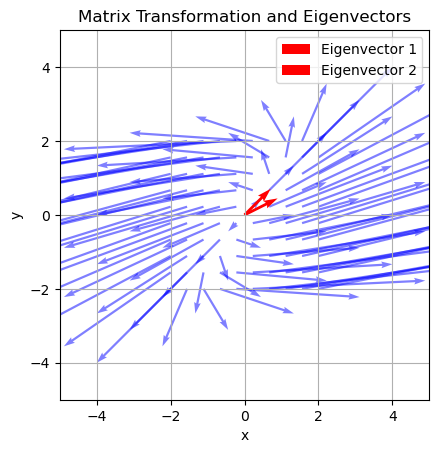

In [9]:
x = np.linspace(-2, 2, 10)
y = np.linspace(-2, 2, 10)
X, Y = np.meshgrid(x, y)
grid = np.vstack([X.ravel(), Y.ravel()])

transformed_grid = np.dot(A, grid)

fig, ax = plt.subplots()
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_aspect('equal')

ax.quiver(grid[0, :], grid[1, :], transformed_grid[0, :] - grid[0, :], transformed_grid[1, :] - grid[1, :], angles='xy', scale_units='xy', scale=1, color='blue', alpha=0.5)

for i in range(len(eigenvalues)):
    eigenvector = eigenvectors[:, i]
    ax.quiver(0, 0, eigenvector[0], eigenvector[1], angles='xy', scale_units='xy', scale=1, color='red', label=f'Eigenvector {i+1}')

ax.set_title('Matrix Transformation and Eigenvectors')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
ax.grid(True)
plt.show()


# **GRADIENT DESCENT PROBLEMS**

In [10]:
def f1(x):
    return (1/4)*(x**2) + 3*x + 9

def derivative_f1(x):
    return ((1/2)*x + 3)**2

def gradient1(x):
    return derivative_f1(x)

x = 10
x1 = None
step_size = 0.1
iterations = 100

for i in range(iterations):
    grad1 = gradient1(x)
    x = x - step_size * grad1
    if i % 10 == 0:
        print(f"Iteration {i}: x = {x:.4f}, f(x) = {f1(x):.4f}")

print(f"Final value: x = {x:.4f}, f(x) = {f1(x):.4f}")
# Correction: remove the square operation in the derivative function

Iteration 0: x = 3.6000, f(x) = 23.0400
Iteration 10: x = -3.4359, f(x) = 1.6437
Iteration 20: x = -4.4692, f(x) = 0.5859
Iteration 30: x = -4.9032, f(x) = 0.3008
Iteration 40: x = -5.1438, f(x) = 0.1833
Iteration 50: x = -5.2972, f(x) = 0.1235
Iteration 60: x = -5.4037, f(x) = 0.0889
Iteration 70: x = -5.4820, f(x) = 0.0671
Iteration 80: x = -5.5421, f(x) = 0.0524
Iteration 90: x = -5.5896, f(x) = 0.0421
Final value: x = -5.6246, f(x) = 0.0352


In [11]:
def f2(x):
    return (1/144)*(x**4) + x**3 + 54*(x**2) + 1296*x + 11664

def derivative_f2(x):
    return (1/36)*(x**3) + 3*x**2 + 108*x + 1296

def dderivative_f2(x):
    return (1/12)*(x**2) + 6*x + 108

def gradient2(x):
    return dderivative_f2(x)

x = 10
x1 = None
step_size = 0.1
iterations = 100

for i in range(iterations):
    if x1 is not None:
        grad2 = gradient2(x1)
    else:
        grad2 = gradient2(x)
    x1, x = x, x - step_size * grad2
    if i % 10 == 0:
        print(f"Iteration {i}: x = {x:.4f}, f(x) = {f2(x):.4f}")

print(f"Final value: x = {x:.4f}, f(x) = {f2(x):.4f}")
# Correction: replace second derivative with first, compute gradient at the current step

Iteration 0: x = -7.6333, f(x) = 4496.4599
Iteration 10: x = -33.4699, f(x) = 0.2846
Iteration 20: x = -33.9333, f(x) = 0.1267
Iteration 30: x = -34.2503, f(x) = 0.0651
Iteration 40: x = -34.4814, f(x) = 0.0369
Iteration 50: x = -34.6577, f(x) = 0.0225
Iteration 60: x = -34.7968, f(x) = 0.0146
Iteration 70: x = -34.9095, f(x) = 0.0098
Iteration 80: x = -35.0026, f(x) = 0.0069
Iteration 90: x = -35.0809, f(x) = 0.0050
Final value: x = -35.1414, f(x) = 0.0038


#**Parameters**

In [12]:
# We will use this code for demonstrations of different function and different step sizes
# This code snippet in this notebook need not to be sent to students before tutorials, only made for explaning things
import time

# def f(x):
#     return x**2
# def derivative_f(x):
#     return 2*x

def f(x):
    return x**4 - 6*x**3 + 25*x + 30
def derivative_f(x):
    return 4*x**3 - 18*x**2 + 25

initial_x = 10
iterations = 100
learning_rate = 0.001

# Store the values for visualization
x_values = []
f_values = []

x = initial_x
start_time = time.time()

for i in range(iterations):
    x_values.append(x)
    f_values.append(f(x))

    grad = derivative_f(x)
    x = x - learning_rate * grad

end_time = time.time()
total_time = end_time - start_time


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))
x_range = np.linspace(-10, 10, 400)
y_range = f(x_range)

# Plot the function
ax.plot(x_range, y_range, label=r'$f(x) = x^2$', color='black', linestyle='--')
line, = ax.plot([], [], 'ro', label='Gradient Descent Path', markersize=8)  # Larger marker size for visibility
text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

# Set plot limits and labels
ax.set_xlim(-10, 10)
ax.set_ylim(0, 110)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.legend()
ax.grid(True)

# Animation function
def animate(i):
    line.set_data(x_values[i], f_values[i])
    text.set_text(f'Iteration: {i+1}\nTime Elapsed: {total_time:.2f} seconds')
    return line, text

# Create the animation
ani = animation.FuncAnimation(fig, animate, frames=len(x_values), interval=200, repeat=False)

plt.close(fig) # Extra static plot was coming

# Display the animation in Notebook
from IPython.display import HTML
HTML(ani.to_jshtml())


/tmp/ipykernel_4567/1578240940.py:26: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line.set_data(x_values[i], f_values[i])
